In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import seaborn as sb
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from sklearn.neighbors import NearestNeighbors  
from sklearn.cluster import DBSCAN

In [2]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading dataset
data = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
data.shape

(3999, 12)

In [5]:
# Column rename.
#data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)

#Set ID as Index Column
#data.set_index('ID',inplace=True)
#data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


def column_preprocessor(df):
    count = 0
    for row in df:
        try:
            if type(row) != int:
                df.loc[count] = np.nan
        except:
            pass
        count +=1

column_preprocessor(data[data.columns])

In [7]:
data.isna().any().sum()

0

EDA Performing

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID#,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


In [9]:
data.head(2)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0


Exploring data using Visualisation

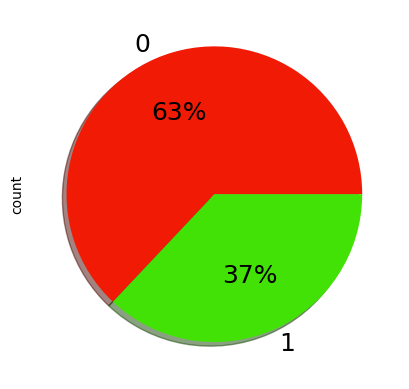

In [10]:
# Previously miles award status

data['Award?'].value_counts().plot(kind='pie', autopct='%2.0f%%', fontsize='18', 
                                        colors = ['#F11A05','#43E206'], shadow =True)
plt.show()


Since from previous award status most of the customer not awarded with any schemes.


# Correlation Matrix

In [11]:
# we have to select those data coloumns who have numeric values.
numeric_data = data.select_dtypes(include=[np.number])
numeric_data.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


In [12]:
# Checking for Correlation between variables
numeric_data.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


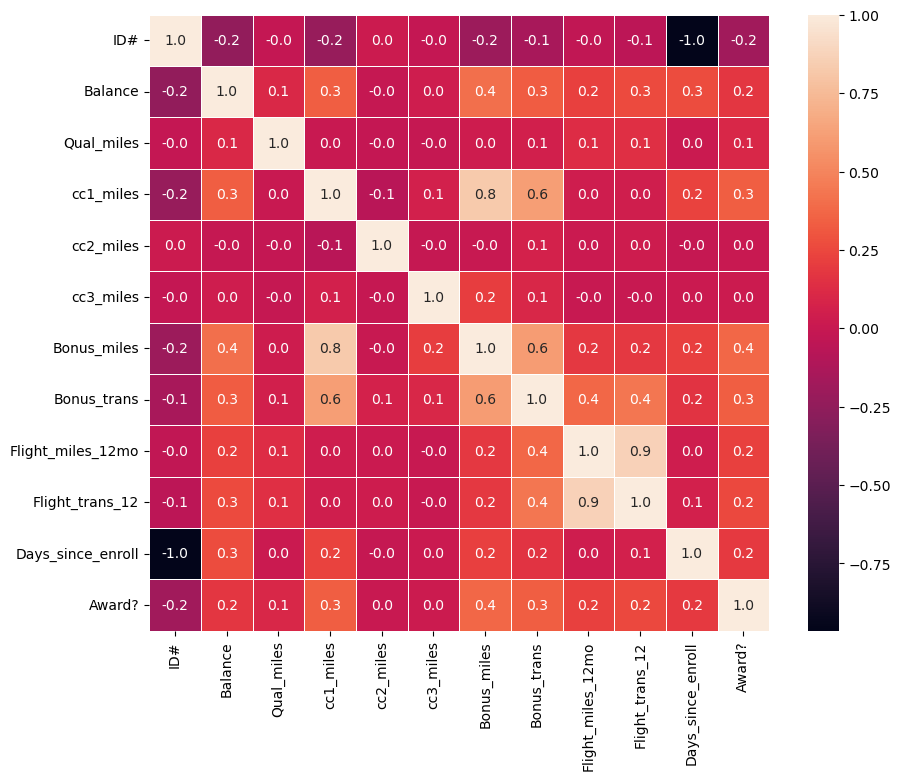

In [13]:
# correlation heatmap

f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(numeric_data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

observation:-
ID# is negatively correlated with days_since_enroll

flight_trans_12 is positively correlated with flight_miles_12mo

bonus_trans is positively correlated with cc1_miles

bonus_trans is positively correlated with bonus_miles

bonus_miles is positively correlated with cc1_miles

Flight_trans_12 positively correlated with Flight_miles_12mo

cc1_miles positively correlated with  Bonus_miles

Bonus_trans positively correlated with Bonus_miles


Bonus_trans positively correlated with  cc1_miles

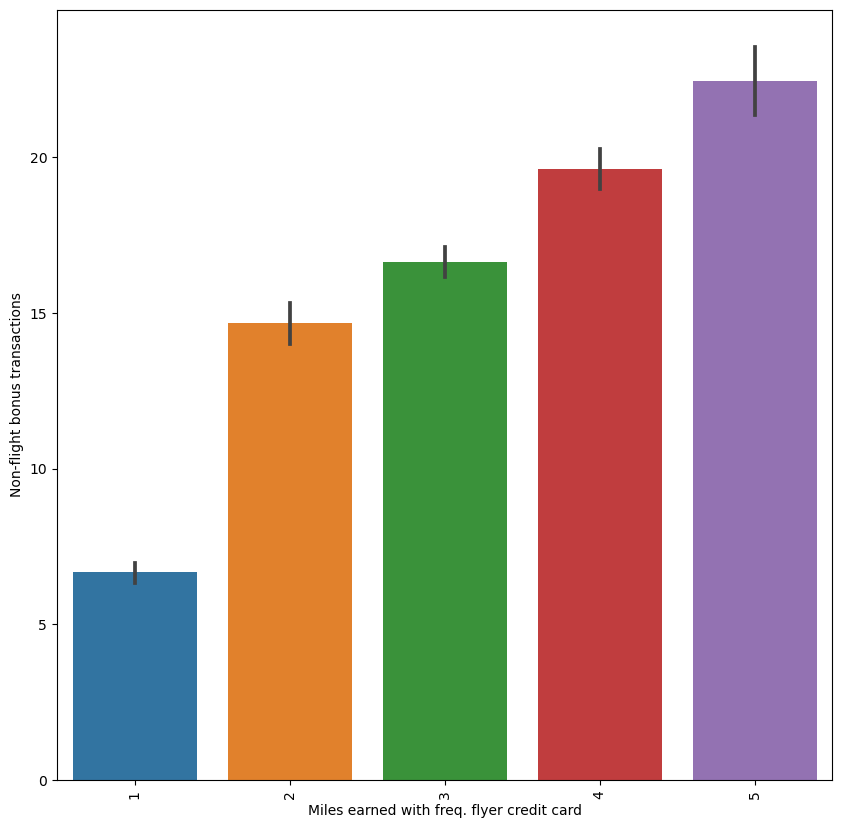

In [14]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions 
plt.figure(figsize = (10,10))
sorted_data = data[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

People who fly more frequently use bonus transactions more

ID#


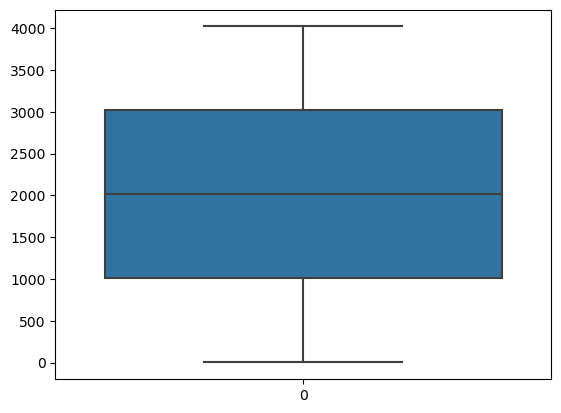

Balance


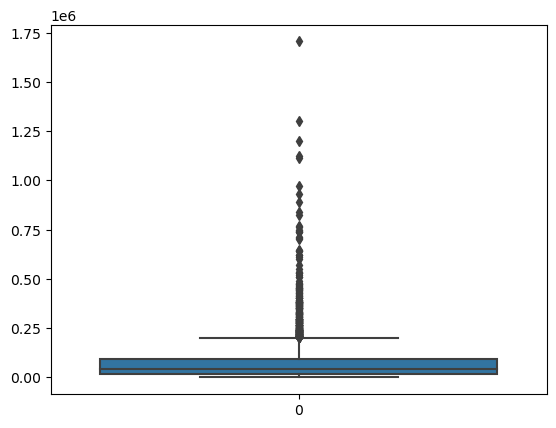

Qual_miles


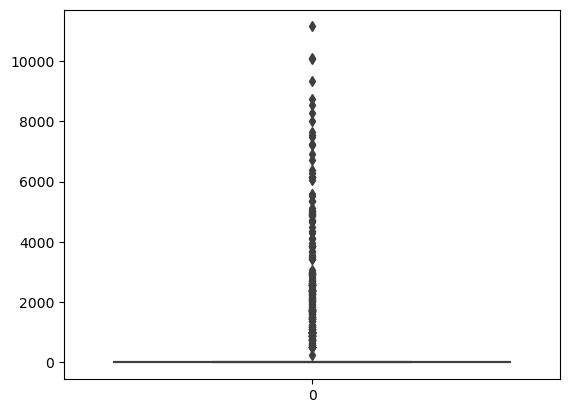

cc1_miles


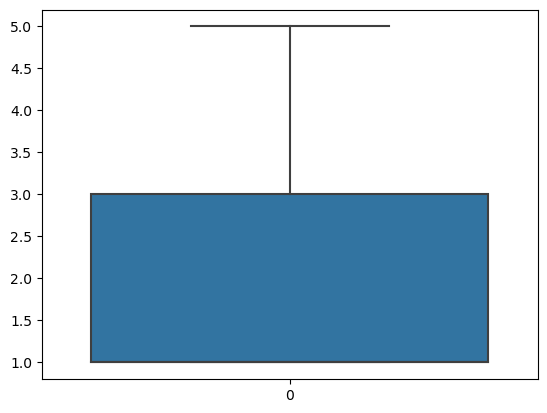

cc2_miles


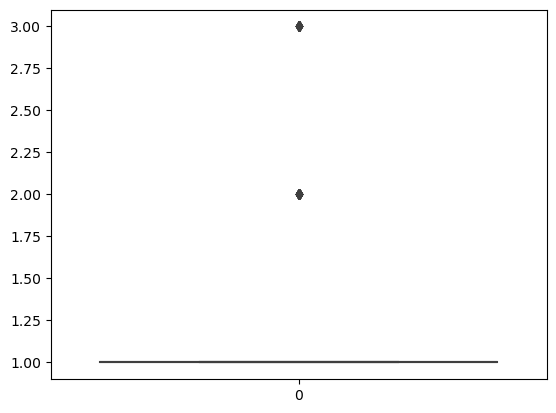

cc3_miles


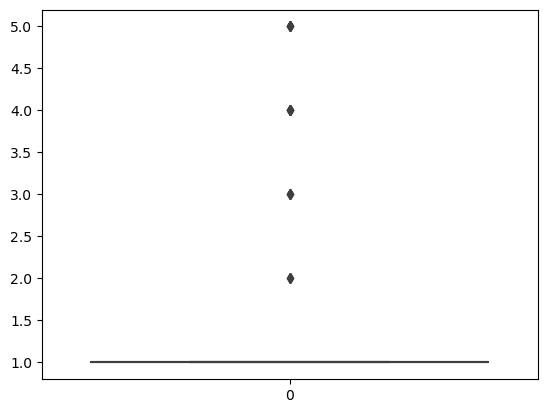

Bonus_miles


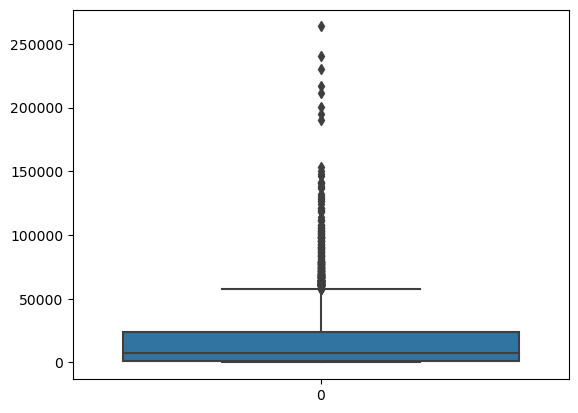

Bonus_trans


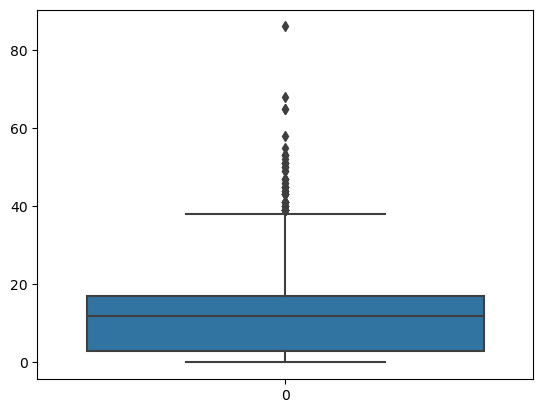

Flight_miles_12mo


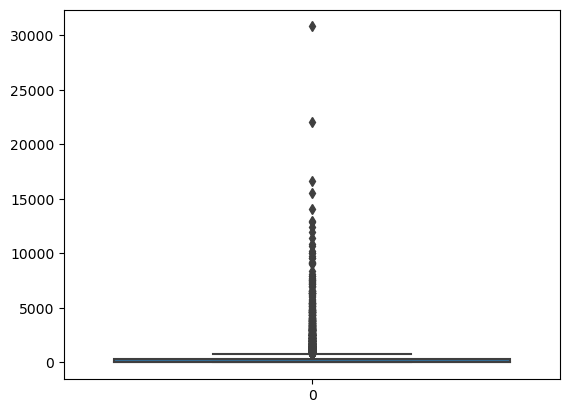

Flight_trans_12


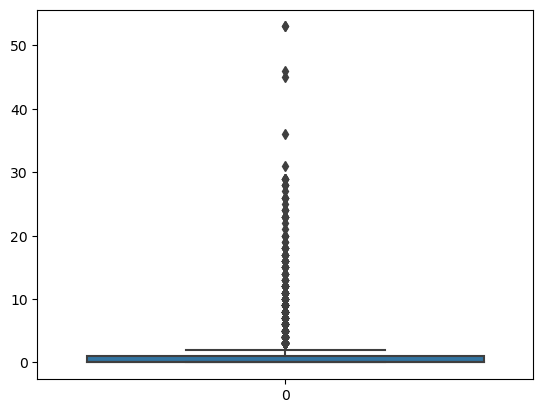

Days_since_enroll


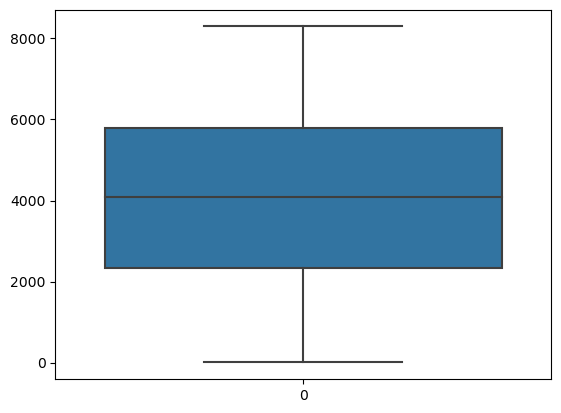

Award?


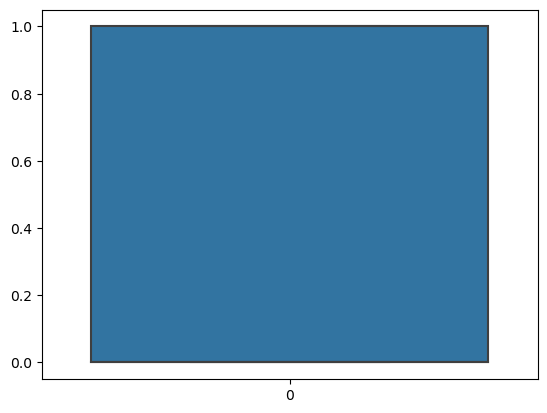

In [15]:
 # Box Plot for every feature, singled out
    
for n in data.columns:
    print(n)
    sns.boxplot(data[n])
    plt.show()

#  Outlier Analysis¶

<Axes: >

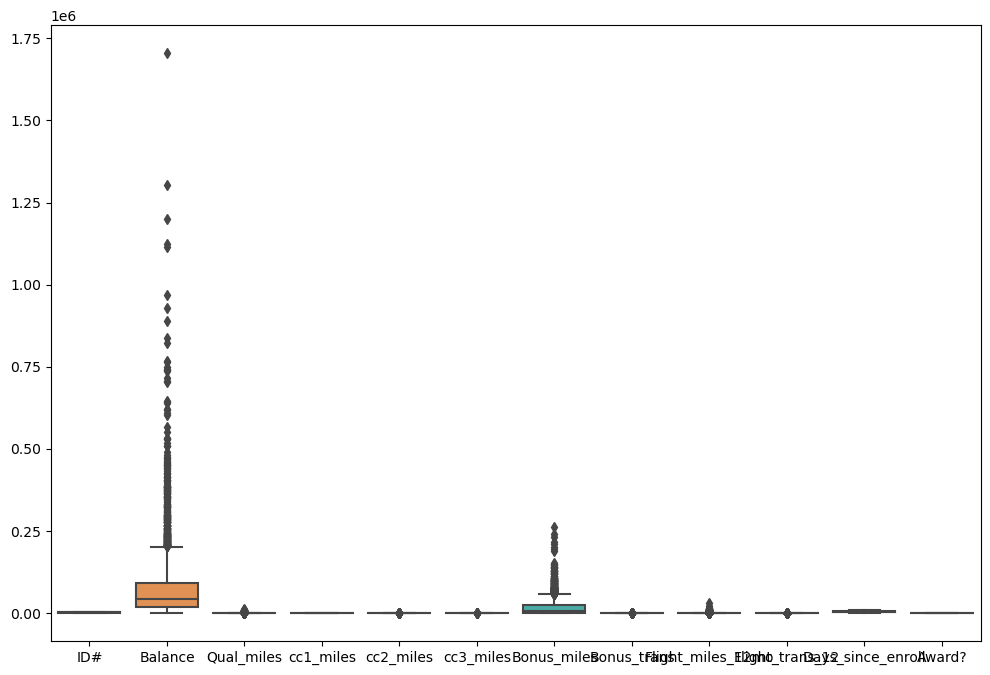

In [16]:
# Box plot for every feature in the same graph

plt.figure(figsize=(12,8))
sns.boxplot(data=data)

<Axes: >

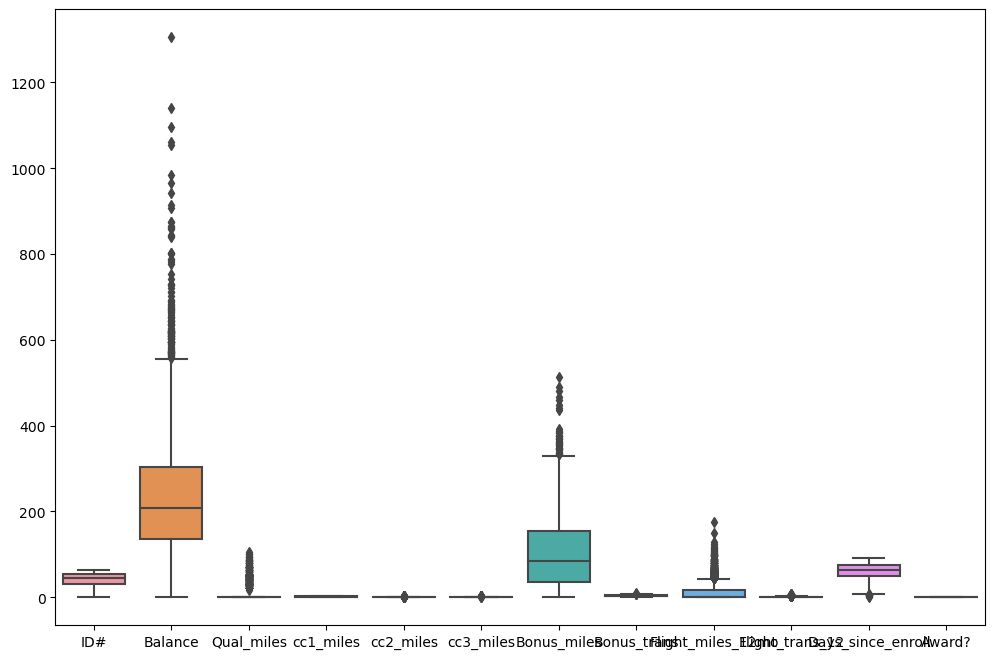

In [17]:
# we use sqrt() to see more clearly despite the outliers

plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(data))

here most of outliers detect in Balance,&Bonus miles,Flight_miles_12mo,Qual_miles Coloumn

lets remove these outliers one by one

In [18]:
data.head(100)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,98,16796,0,1,1,1,2875,16,0,0,6773,0
96,99,57346,0,1,1,1,5560,23,0,0,6766,0
97,100,102062,0,4,1,1,44247,16,0,0,6758,0
98,101,22324,0,1,1,1,1375,4,0,0,6753,0


In [19]:
# removing the outliers from Balance

q1 = data['Balance'].quantile(0.25)
q3 = data['Balance'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df1 = data[(data['Balance']>ll)&(data['Balance']<ul)]

df1.head(100)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
105,108,3734,0,5,1,1,61096,18,150,2,6760,1
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1
107,110,43498,0,1,1,1,0,0,0,0,6759,1
108,111,84674,0,4,1,1,46335,14,50,1,6738,1


Even in this small sample, we can see that the last few lines of df1.head() are different, so removing the outliers seems to have worked. Now to visualize;

<Axes: >

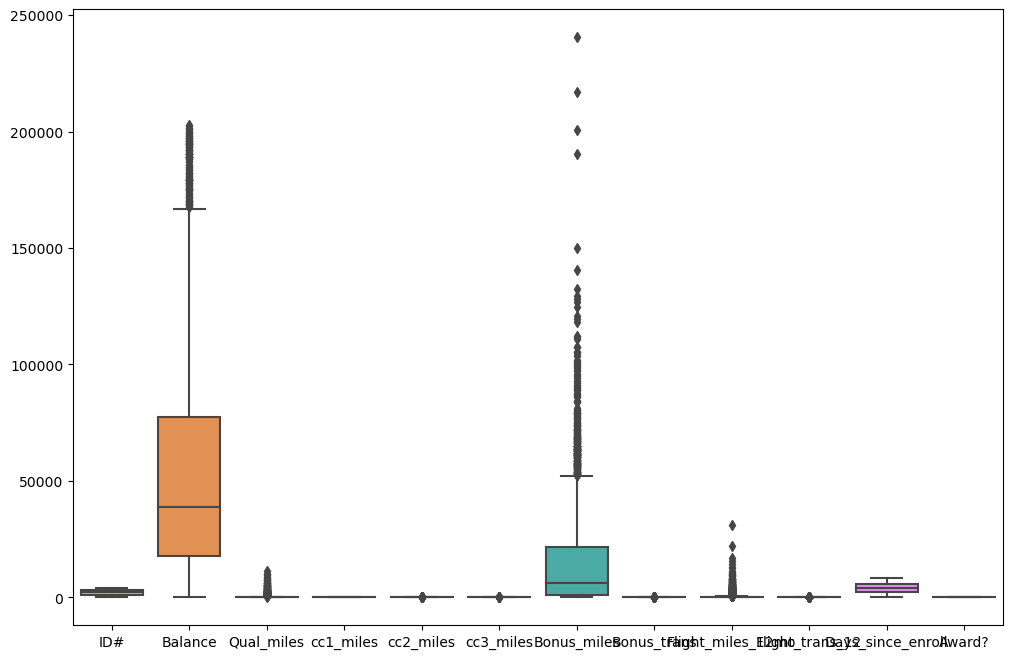

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df1)

In [21]:
data_shape = data.shape

df1_shape = df1.shape

print("shape of original dataframe:", data_shape, "\n")
print("shape of new dataframe:", df1_shape)

shape of original dataframe: (3999, 12) 

shape of new dataframe: (3733, 12)


Removing the outliers from "Bonus_miles"

In [22]:
# removing outliers from Bonus_miles:

q1 = data['Bonus_miles'].quantile(0.25)
q3 = data['Bonus_miles'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df2 = df1[(df1['Bonus_miles']>ll)&(df1['Bonus_miles']<ul)]

<Axes: >

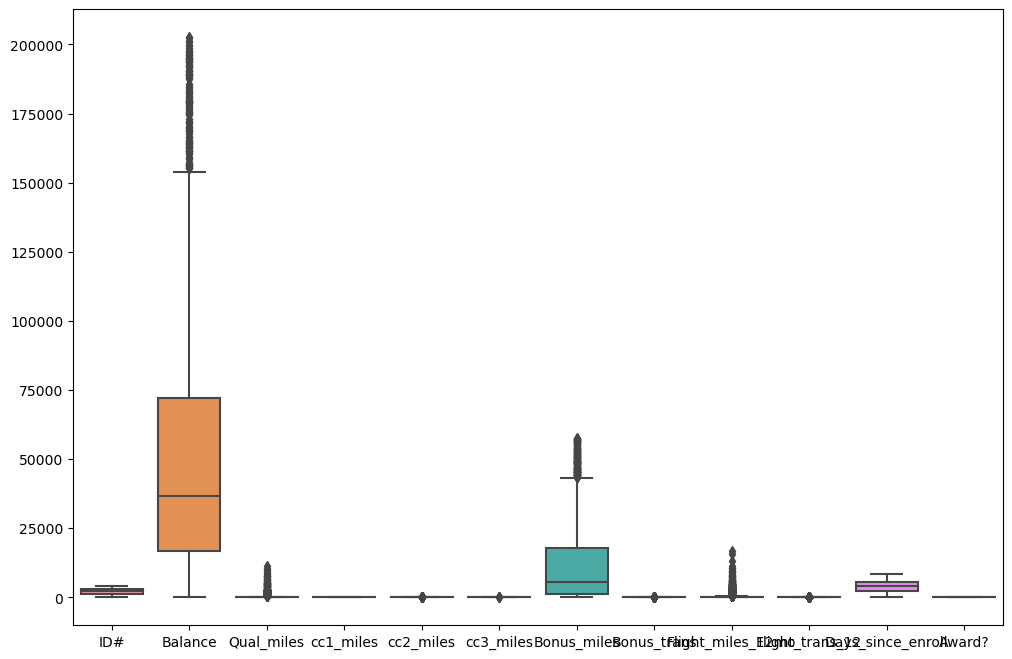

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df2)

Removing the outliers from "Flight_miles_12mo"

In [24]:
# Removing outliers from Flight_miles_12mo

q1 = data['Flight_miles_12mo'].quantile(0.25)
q3 = data['Flight_miles_12mo'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df3 = df2[(df2['Flight_miles_12mo']>ll)&(df2['Flight_miles_12mo']<ul)]

<Axes: >

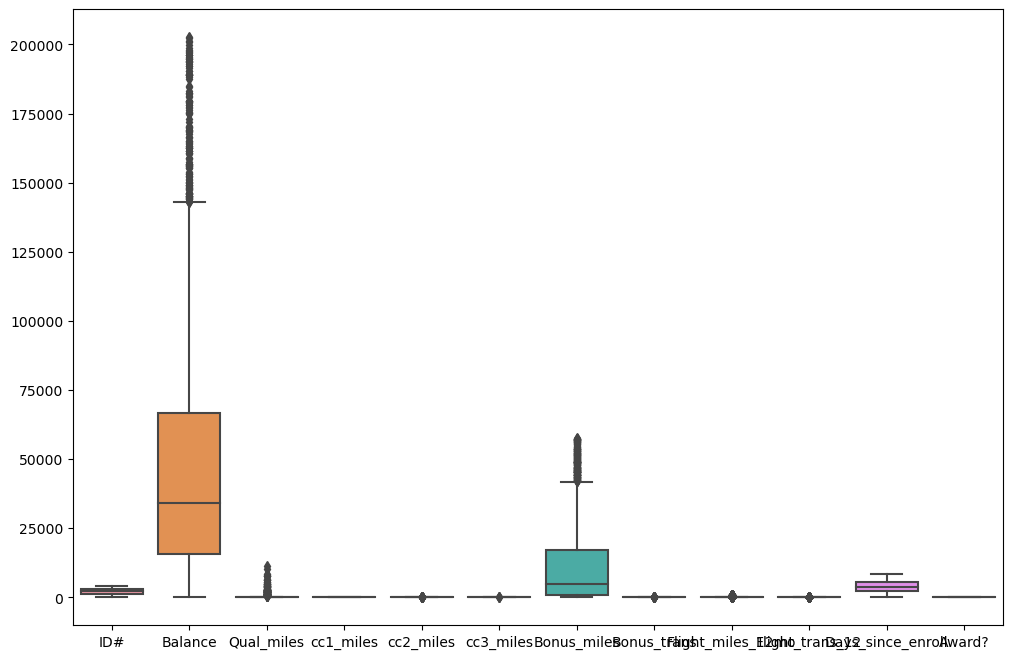

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df3)

Removing the outliers from "Qual_miles"

In [26]:
#Removing the outliers from "Qual_miles"
q1 = data['Qual_miles'].quantile(0.25)
q3 = data['Qual_miles'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df4 = df3[(df3['Qual_miles']>ll)&(df3['Qual_miles']<ul)]

<Axes: >

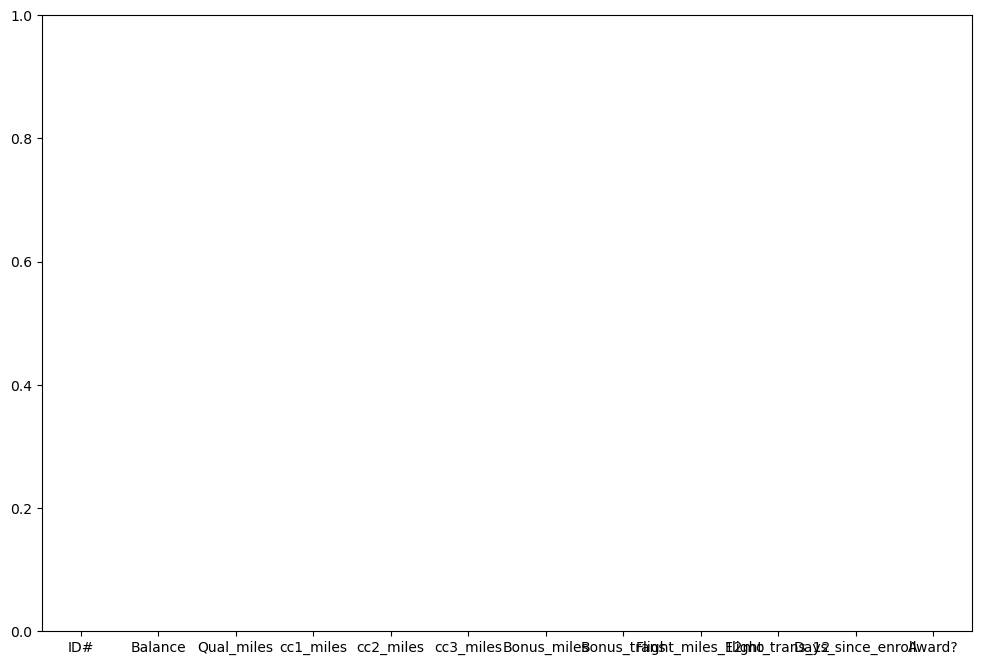

In [27]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df4)

<Axes: >

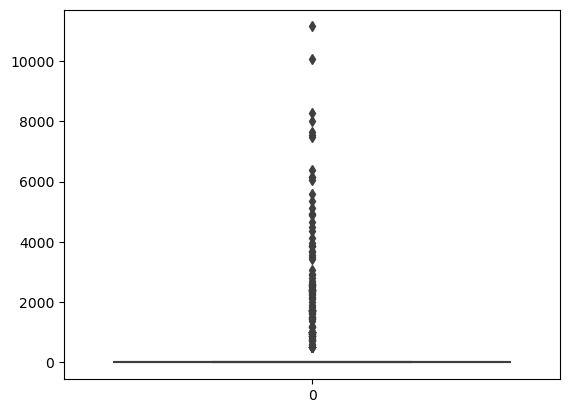

In [28]:
sns.boxplot(df3['Qual_miles'])

The amount of outliers Qual_miles has seems too many (therefore too important) to be removed, so we continue with df3.

In [29]:
df3.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0


In [30]:
df3.shape

(3105, 12)

# Finalizing the dataframe¶

In [31]:
# Renaming the Unnamed: 0 Column into States
data_mdf = df3.rename(columns={'ID#':'ID', 'Award?':'Award'})
data_mdf.head(10)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
10,11,40091,0,2,1,1,7278,10,0,0,6959,0
12,13,43382,0,2,1,1,11150,20,0,0,6924,0
13,14,43097,0,1,1,1,3258,6,0,0,6918,0


In [32]:
# as we know ID & award will not make much contribution during clutering. we will drop both columns.

data_mdf_1 = data_mdf.drop(['ID','Award'],axis=1)
data_mdf_1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
5,16420,0,1,1,1,0,0,0,0,6942


<Axes: >

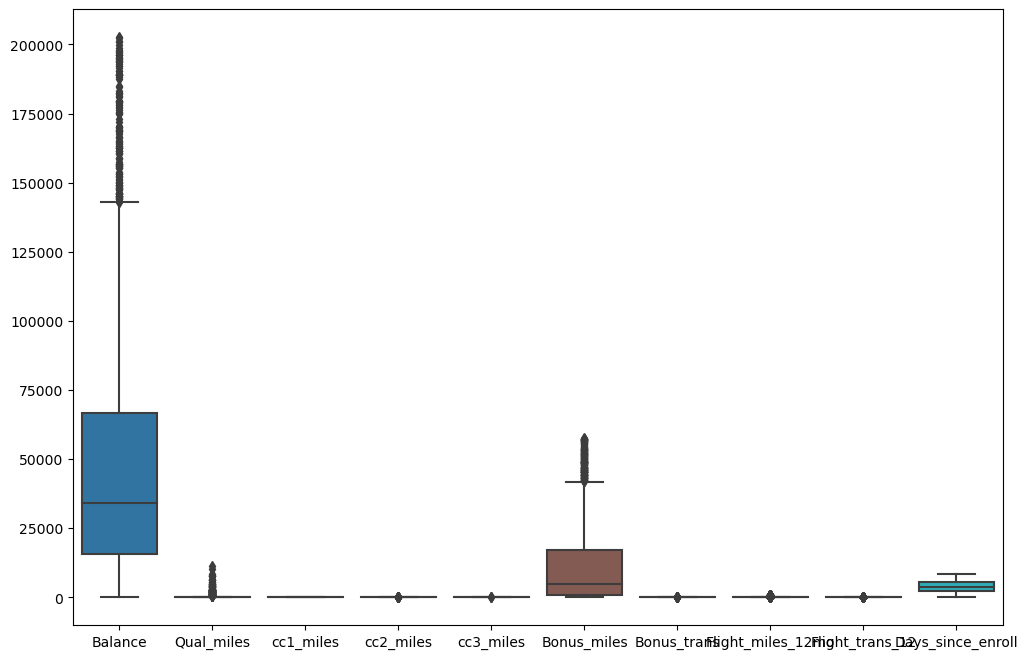

In [33]:
# our final boxgraphs without ID & Award removed

plt.figure(figsize=(12,8))
sns.boxplot(data=data_mdf_1)

Balance


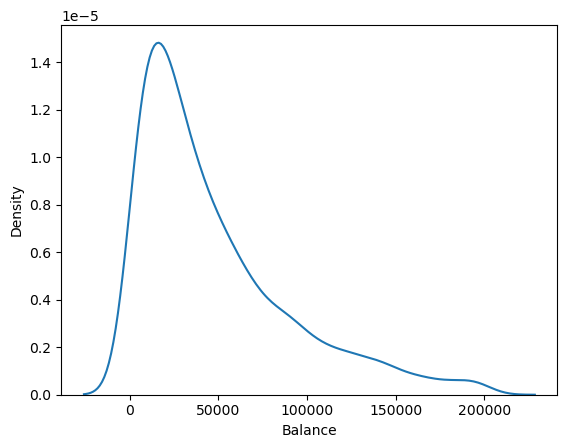

Qual_miles


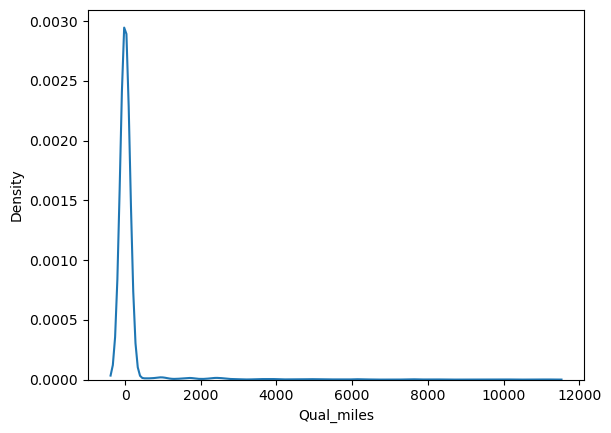

cc1_miles


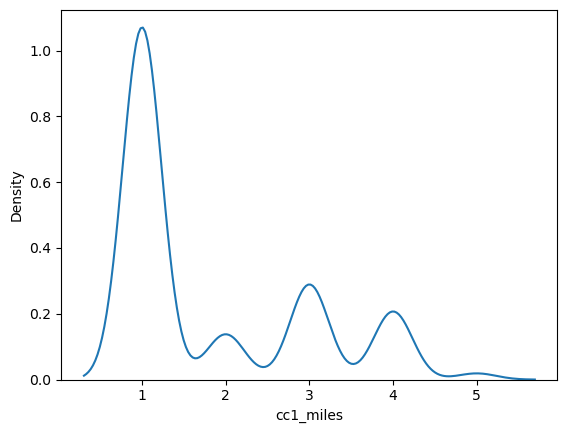

cc2_miles


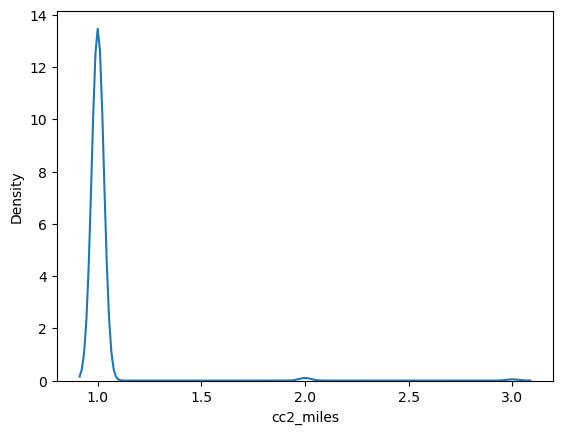

cc3_miles


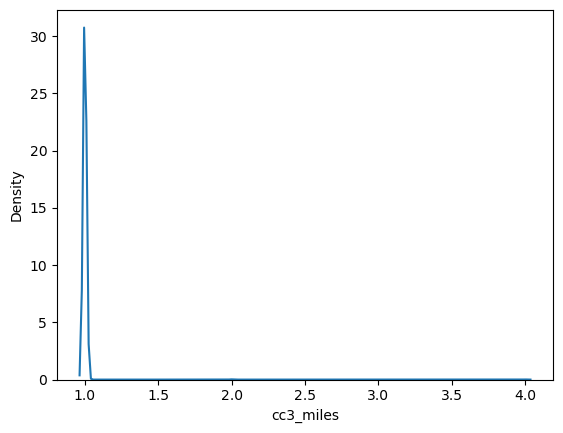

Bonus_miles


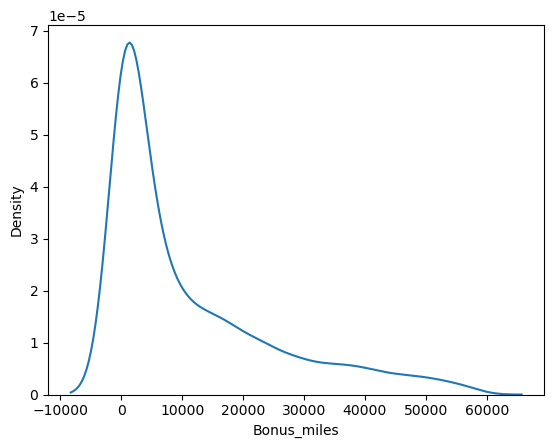

Bonus_trans


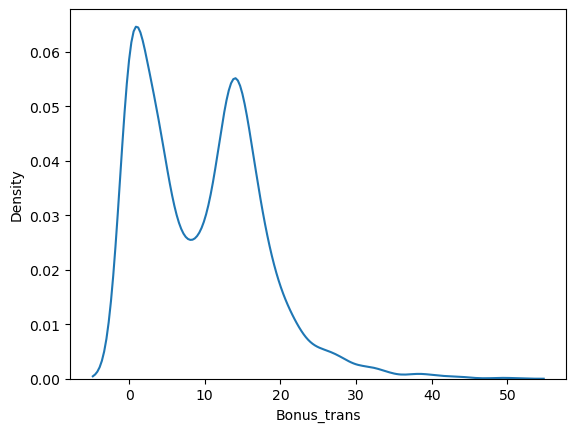

Flight_miles_12mo


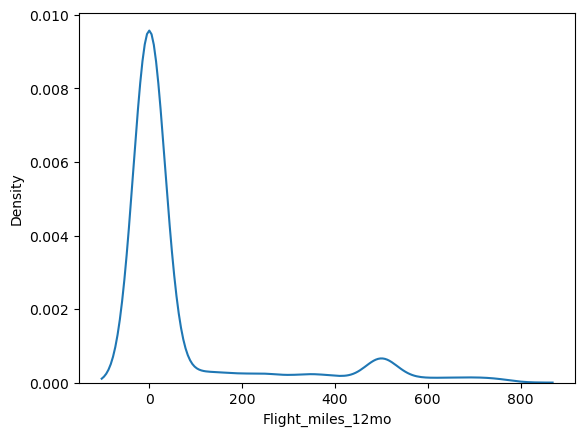

Flight_trans_12


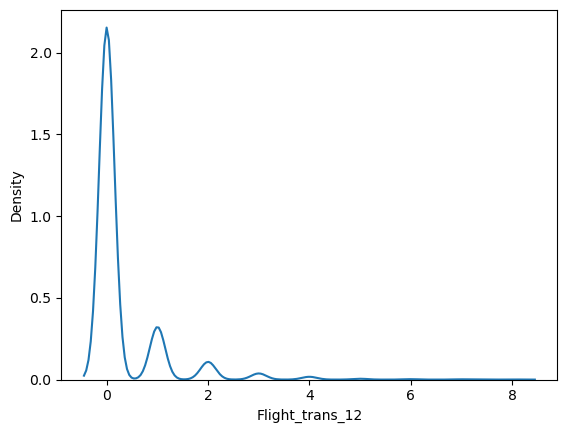

Days_since_enroll


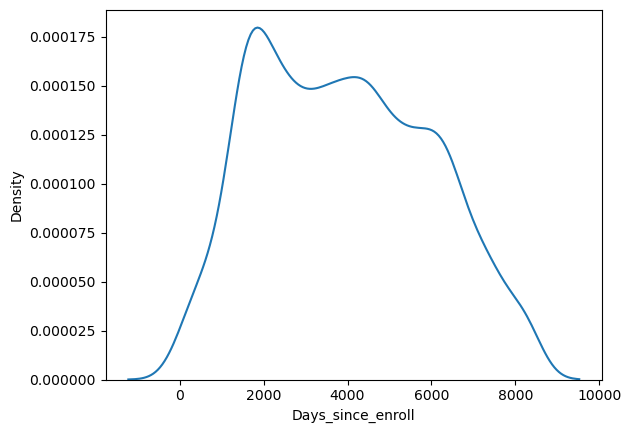

In [34]:
# Kernel Density for every feature, singled out

for n in data_mdf_1.columns:
    print(n)
    sns.kdeplot(df3[n])
    plt.show()

 # Normalizing the Data

In [35]:
from sklearn.preprocessing import StandardScaler

std_df = StandardScaler().fit_transform(data_mdf)      # this will used for kmeans
std_df.shape

(3105, 12)

# MinMaxScalar

In [36]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(data_mdf)
minmax_df.shape

(3105, 12)

# Running PCA of standardized data.¶¶

In [37]:
# applying PCA on std_df

# we consider 0.95 variance in n_components to not lose any data.

from sklearn.decomposition import PCA

pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df = pca_std.fit_transform(std_df)

In [38]:
# eigenvalues

print(pca_std.singular_values_)

[98.2364688  75.44223356 74.1287092  56.42853509 56.00593235 55.25697452
 53.91869895 42.19805072 37.18194898]


In [39]:
#  variance contained in each formed PCA

print(pca_std.explained_variance_ratio_*100)

[25.90017124 15.27517607 14.7478946   8.54583889  8.41831578  8.19466783
  7.80253918  4.7790539   3.71040615]


In [40]:
# Cummulative variance ratio

cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([25.90017124, 41.17534731, 55.92324191, 64.4690808 , 72.88739658,
       81.08206441, 88.88460358, 93.66365748, 97.37406363])

Applying PCA on standardized data with 95% variance gives 8 PCA components

 # Running PCA of MinMaxscalar data.

In [41]:
# applying PCA on minmax_df

from sklearn.decomposition import PCA

pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(minmax_df)

In [42]:
 #eigenvalues

print(pca_minmax.singular_values_)

[28.28484083 20.63338197 18.79072658 13.16241346  9.51446489  6.66972589]


In [43]:
# variance containing in each formed PCA

print(pca_minmax.explained_variance_ratio_*100)

[40.98911681 21.81232292 18.09040247  8.87630344  4.6379901   2.27917175]


Applying PCA on MinMaxscaler transformation data gives 6 PCA components.

# Hierarchical Clustering Algorithm¶

 # By using Dendogram Method  ¶

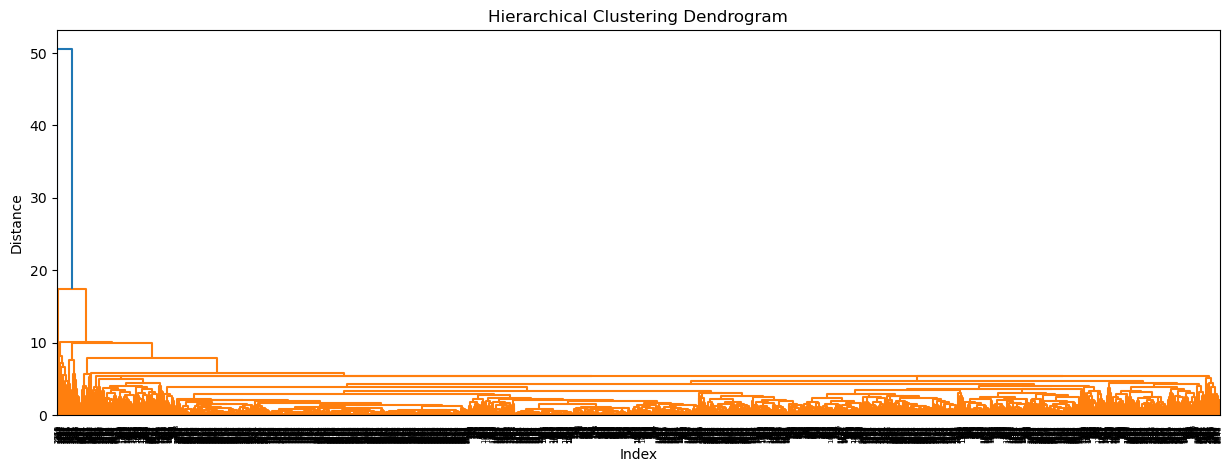

In [44]:
#dendrogram=sch.dendrogram(sch.linkage(df_norm,method='average',metric="euclidean"))
z = linkage(std_df, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()     

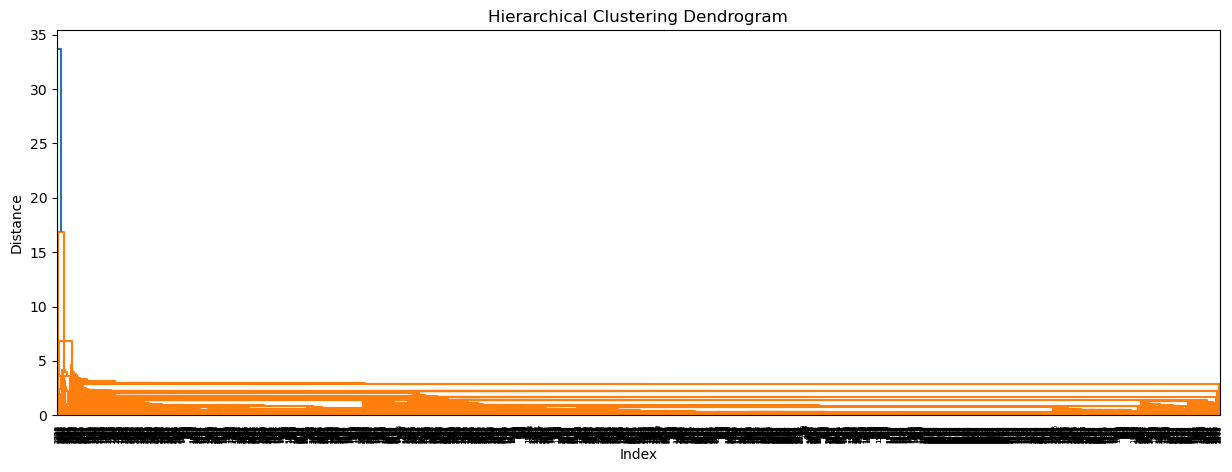

In [45]:
# Hierarchial Clustering with single linkage:
z = linkage(std_df, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()     

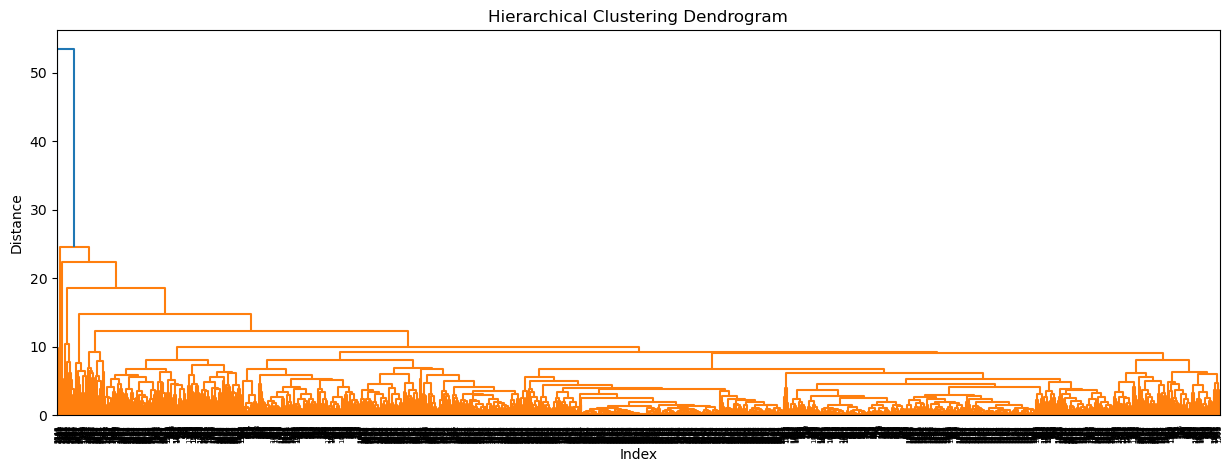

In [46]:
# Hierarchial Clustering with  complete linkage:
z = linkage(std_df, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()     

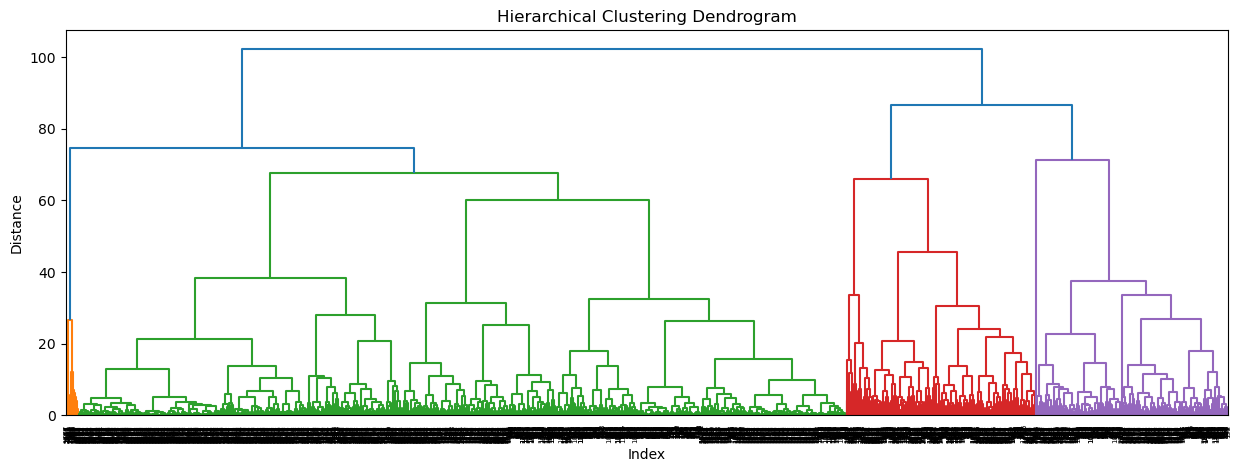

In [47]:
# Hierarchial Clustering with ward linkage:
z = linkage(std_df, method="ward",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()     

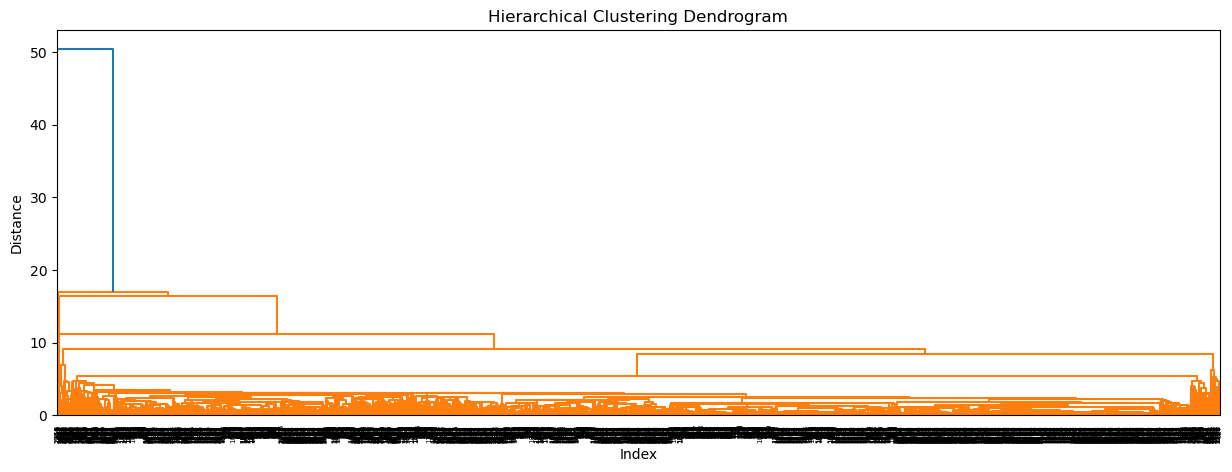

In [48]:
# Hierarchial Clustering with "centroid" linkage:
z = linkage(std_df, method="centroid",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()     

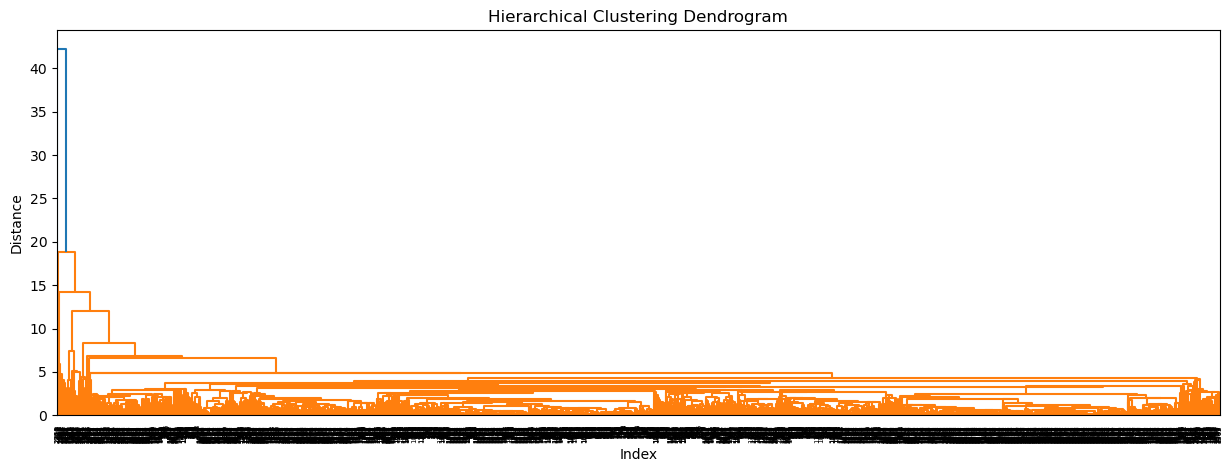

In [49]:
# Hierarchial Clustering with "median" linkage:
z = linkage(std_df, method="median",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()     

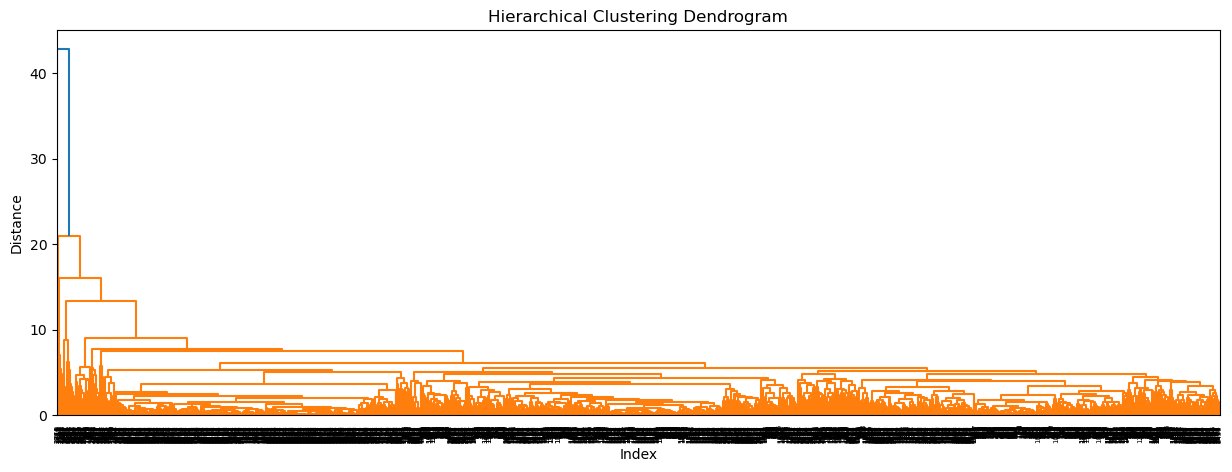

In [50]:
# Hierarchial Clustering with "weighted"linkage:
z = linkage(std_df, method="weighted",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()    

The seperation in Ward Method indicate that 5 is the optimal number for clusters.

# Silhouette Score method

In [51]:
#silhouette Score method applied on Standadrdized data with PCA applying
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
        silhouette_score1 = silhouette_score(pca_std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.22175399449866004
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.9175008490320152
For n_clusters = 2 The average silhouette_score with linkage- average : 0.9175008490320152
For n_clusters = 2 The average silhouette_score with linkage- single : 0.9175008490320152

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.23547638845604463
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.6180954356242113
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7628875665053868
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7628875665053868

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.24920805032998075
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.6192941340121213
For n_clusters = 4 The average silhouette_score with linkage- average : 0.609005583549892
For

Observation: The max score is with cluster numbers 4. I have selected tcluster number = 5

In [52]:
#Taking MinMax transformation data & PCA applied on it.
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels2 = hie_cluster2.fit_predict(pca_minmax_df)
        silhouette_score2 = silhouette_score(pca_minmax_df, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4166336349113954
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.26192787663820355
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4166336349113954
For n_clusters = 2 The average silhouette_score with linkage- single : 0.4166336349113954

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.34572853497947736
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.36386155807589216
For n_clusters = 3 The average silhouette_score with linkage- average : 0.36402617627218525
For n_clusters = 3 The average silhouette_score with linkage- single : 0.3875602823441733

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.29281630654437873
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.33825429163174303
For n_clusters = 4 The average silhouette_score with linkage- average : 0.3110473029351917

Observation: dataset with MinMax transformation & PCA applied on it doesn't imporoved much more score here. So i am taking Standardize data & PCA applied on it .

# Run Hierarchical Clustering.(Agglomerative Clustering)¶

In [53]:
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='average')
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hie.shape)
y_pred_hie

(3105,)


array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [54]:
# Cluster numbers

agg_clustering.n_clusters_

5

In [55]:
# cluster labels for each point

agg_clustering.labels_

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [56]:
# Number of leaves in the hierarchical tree.

agg_clustering.n_leaves_

3105

In [57]:
# The estimated number of connected components in the graph.

agg_clustering.n_connected_components_

1

In [58]:
# The children of each non-leaf node. Values less than n_samples correspond to leaves of 
#......the tree which are the original samples. A node i greater than or equal to n_samples 
#.........is a non-leaf node and has children children_[i - n_samples]. Alternatively at the 
#...........i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i

agg_clustering.children_

array([[1980, 1981],
       [2843, 2864],
       [2871, 2873],
       ...,
       [6203, 6205],
       [6184, 6206],
       [2216, 6207]])

In [59]:
# Clustering Score

(silhouette_score(pca_std_df, agg_clustering.labels_)*100).round(3)

60.276

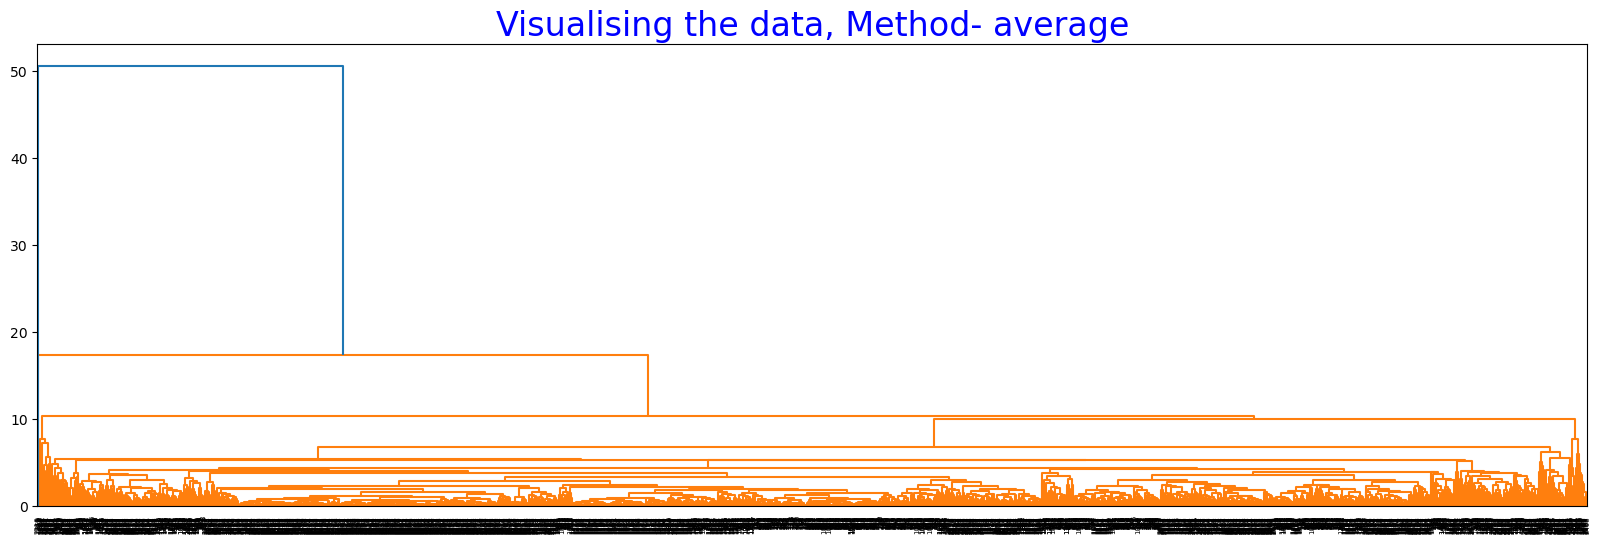

In [60]:
# Plotting Dendrogram.

import scipy.cluster.hierarchy as shc
for methods in ['average']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram2 = shc.dendrogram(shc.linkage(pca_std_df, method = methods,optimal_ordering=False))

In [61]:
# Creating dataframe of cluster lables..

hie_cluster = pd.DataFrame(agg_clustering.labels_.copy(), columns=['Hie_Clustering'])

In [62]:
# Concating model1_Cluster df with main dataset copy

hie_df = pd.concat([data.copy(), hie_cluster], axis=1)
hie_df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hie_Clustering
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4.0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4.0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4.0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4.0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4.0


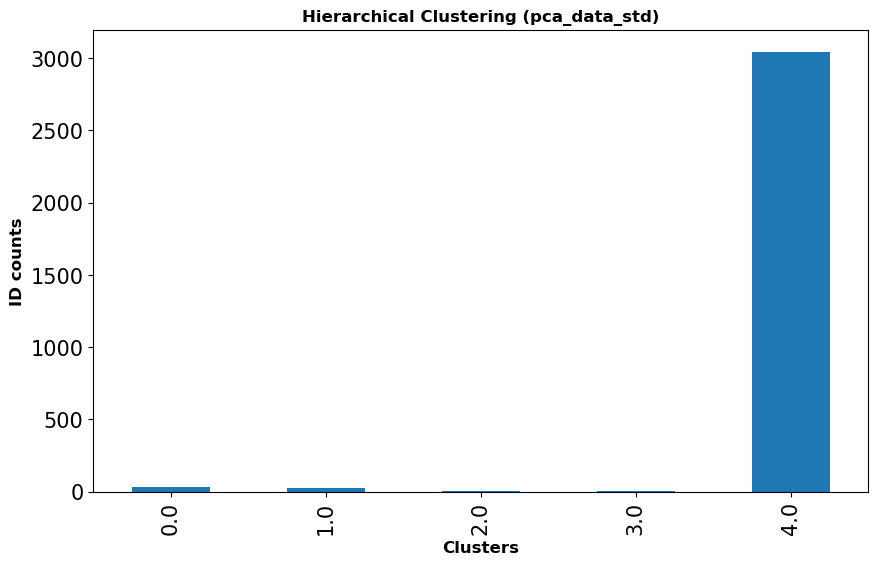

In [63]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
hie_df.groupby(['Hie_Clustering']).count()['ID#'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering (pca_data_std)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

As we have determined with the Dendograms, the color seperation in Ward Method indicate that 5 is the optimal number for clusters.

But, hierarchial clustering overall does not seem to do a really good job for the data we have, since all the passengers have been grouped in cluster 1. And it requires too much cpu. We will proceed with K means clustering.

# Kmeans

In [64]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

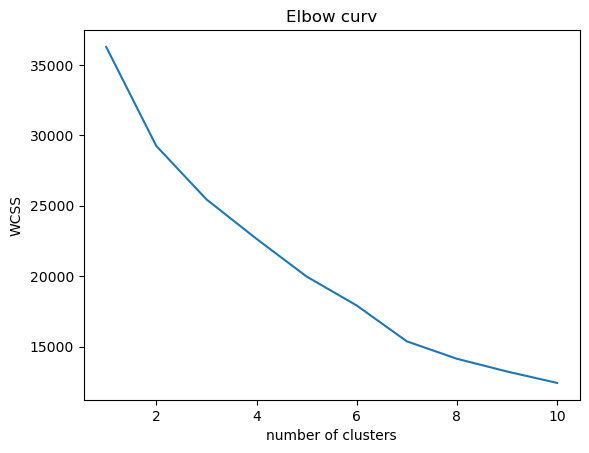

In [65]:
# Elbow curv
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(pca_std_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

from above Elbow curv we see that 5 clusters are made

Before selecting no. of clusters, check Silhouette score by varying number of clusters in the model build. Silhouette score gives the accuracy of a model.

In [66]:
#  Run silhouette Score on Standardized data&applying pca data
list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_std_df)
    sil_score1= silhouette_score(pca_std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.2742707092461802
For n_clusters = 3 The average silhouette_score is : 0.2898171538341309
For n_clusters = 4 The average silhouette_score is : 0.2398307892566707
For n_clusters = 5 The average silhouette_score is : 0.24687105369758822
For n_clusters = 6 The average silhouette_score is : 0.2496488002157035
For n_clusters = 7 The average silhouette_score is : 0.2595603415056789
For n_clusters = 8 The average silhouette_score is : 0.2535582581230431
For n_clusters = 9 The average silhouette_score is : 0.2714117333412094


Model with 5 no. of clusters has the highest accuracy. Hence build the model with 5 no.of clusters.

In [67]:
#  Run silhouette Score on Minmaxscalar data &applying pca data
list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_minmax_df )
    sil_score2= silhouette_score(pca_minmax_df , cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score2)

For n_clusters = 2 The average silhouette_score is : 0.4166336349113954
For n_clusters = 3 The average silhouette_score is : 0.3236235921121819
For n_clusters = 4 The average silhouette_score is : 0.3415945228896975
For n_clusters = 5 The average silhouette_score is : 0.3477230558560182
For n_clusters = 6 The average silhouette_score is : 0.3597155320859806
For n_clusters = 7 The average silhouette_score is : 0.35011379441349616
For n_clusters = 8 The average silhouette_score is : 0.35132456847067667
For n_clusters = 9 The average silhouette_score is : 0.3557831314495158


Observation: dataset with MinMax transformation & PCA applied on it doesn't imporoved much more score here. So i am taking Standardize data & PCA applied on it .

# Runnning Kmenas

In [68]:
model1 = KMeans(n_clusters=5, random_state=0)
y_predict1 = model1.fit_predict(pca_std_df)
y_predict1.shape

(3105,)

In [69]:
# these are nothing but cluster labels...

y_predict1

array([1, 1, 1, ..., 3, 2, 0])

In [70]:
# y_predict & cluster labels both are same use any one of them to avoid further confusion.

model1.labels_

array([1, 1, 1, ..., 3, 2, 0])

In [71]:
# cluster centres associated with each lables

model1.cluster_centers_

array([[-1.54819608e+00,  3.16419763e-01, -7.39764307e-01,
        -1.01379044e-01, -8.38388338e-03, -6.98750166e-02,
        -1.52035747e-02,  7.46703127e-02,  5.70921866e-02],
       [-4.65173286e-01, -1.19886942e+00,  9.63595236e-01,
        -7.71339465e-02,  2.13854297e-02,  2.17956496e-02,
         4.83013948e-02, -8.35419423e-02,  8.33599451e-02],
       [ 7.27358320e-01,  2.57643411e+00,  1.90112986e+00,
         4.71652402e-03,  1.11804160e-01, -1.62543621e-01,
        -5.78101892e-02, -4.85453632e-02,  1.99231089e-02],
       [ 2.11669930e+00, -2.54981925e-01, -8.33552551e-01,
        -1.06199077e-01,  1.08499317e-02, -5.06319708e-02,
        -5.66070703e-03, -4.53631957e-03, -1.49191006e-01],
       [-1.61240437e-01,  2.96593850e-01, -1.62405806e-01,
         7.59388640e+00, -1.67656907e+00,  4.49327704e+00,
        -1.23972322e-02,  3.94682395e-01, -3.74754410e-01]])

In [72]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model1.inertia_


19975.393808737237

In [73]:
# Clustering Score

(silhouette_score(pca_std_df, model1.labels_)*100).round(3)

24.687

In [74]:
# this will give what hyper parameter is used in model.


model1.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 5,
 'n_init': 'warn',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

Putting Cluster lables into original dataset And analysis of the same.¶

In [75]:
# Creating dataframe of cluster lables..

model1_cluster = pd.DataFrame(model1.labels_.copy(), columns=['Kmeans_Clustering'])

In [76]:
# Concating model1_Cluster df with main dataset copy

Kmeans_df = pd.concat([data.copy(), model1_cluster], axis=1)
Kmeans_df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kmeans_Clustering
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1.0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1.0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1.0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1.0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1.0


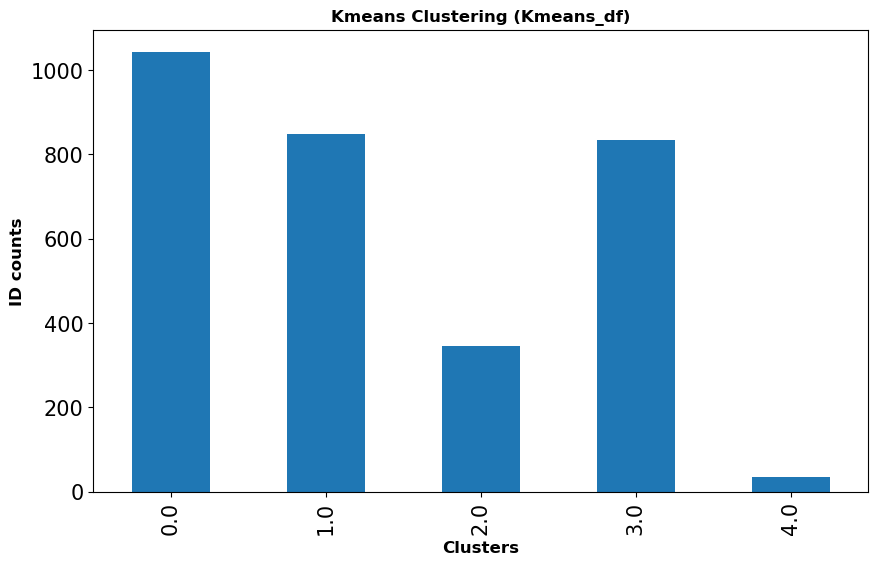

In [77]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
Kmeans_df.groupby(['Kmeans_Clustering']).count()['ID#'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering (Kmeans_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

# DBSCAN

In [78]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [79]:
# Nearest neighbours = 2x(no. of Dimensions/columns)
nn = NearestNeighbors(n_neighbors=8)
nn = nn.fit(pca_std_df)
distances, indices = nn.kneighbors(pca_std_df)  

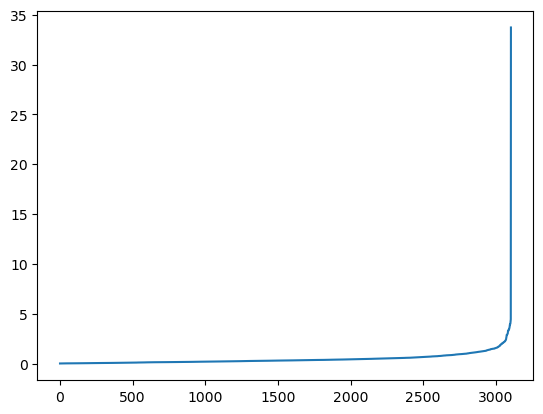

In [80]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)  

The curve took a sharp bend at a value of 2. Hence the epsilon value is 2.¶

# Building the DBSCAN clustering model

In [81]:
# min_samples=(no. of Dimensions/columns)+1
d_cluster = DBSCAN(eps=2, min_samples=5)
d_cluster.fit(pca_std_df)

DBSCAN(eps=2)

In [82]:
d_cluster.labels_ 

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [83]:
ds = pd.Series(d_cluster.labels_) 
data['d_clust']=ds
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,d_clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0.0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0.0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0.0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0.0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0.0


In [84]:
(silhouette_score(pca_std_df, d_cluster.labels_)*100).round(3)

22.041

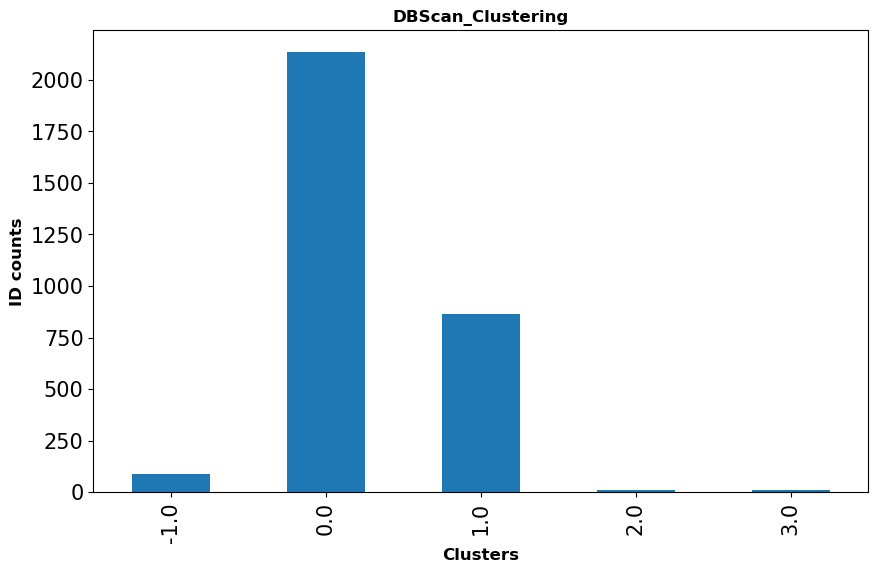

In [85]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['d_clust']).count()['ID#'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBScan_Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

# Conclusion Between Kmeans & Hierarchical& DBSCAN

In [86]:
Kmeans_df.groupby(['Kmeans_Clustering']).count()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Kmeans_Clustering,,,,,,,,,,,,
0.0,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044
1.0,848,848,848,848,848,848,848,848,848,848,848,848
2.0,345,345,345,345,345,345,345,345,345,345,345,345
3.0,834,834,834,834,834,834,834,834,834,834,834,834
4.0,34,34,34,34,34,34,34,34,34,34,34,34


In [87]:
hie_df.groupby(['Hie_Clustering']).count()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Hie_Clustering,,,,,,,,,,,,
0.0,34,34,34,34,34,34,34,34,34,34,34,34
1.0,24,24,24,24,24,24,24,24,24,24,24,24
2.0,2,2,2,2,2,2,2,2,2,2,2,2
3.0,1,1,1,1,1,1,1,1,1,1,1,1
4.0,3044,3044,3044,3044,3044,3044,3044,3044,3044,3044,3044,3044


In [88]:
data.groupby(['d_clust']).count()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
d_clust,,,,,,,,,,,,
-1.0,87,87,87,87,87,87,87,87,87,87,87,87
0.0,2135,2135,2135,2135,2135,2135,2135,2135,2135,2135,2135,2135
1.0,863,863,863,863,863,863,863,863,863,863,863,863
2.0,12,12,12,12,12,12,12,12,12,12,12,12
3.0,8,8,8,8,8,8,8,8,8,8,8,8


Conclusion: We will go with Kmeans Clustering Since in hierarchiacl clustering and DBSCAN Clustering most of data is gathherd in one cluster only.

# Cluster Anlysis with KMeans Clustering for Future Decision 

In [89]:
# Groupby Cluster lables

count_df = Kmeans_df.groupby(['Kmeans_Clustering']).count()
count_df


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Kmeans_Clustering,,,,,,,,,,,,
0.0,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044
1.0,848,848,848,848,848,848,848,848,848,848,848,848
2.0,345,345,345,345,345,345,345,345,345,345,345,345
3.0,834,834,834,834,834,834,834,834,834,834,834,834
4.0,34,34,34,34,34,34,34,34,34,34,34,34


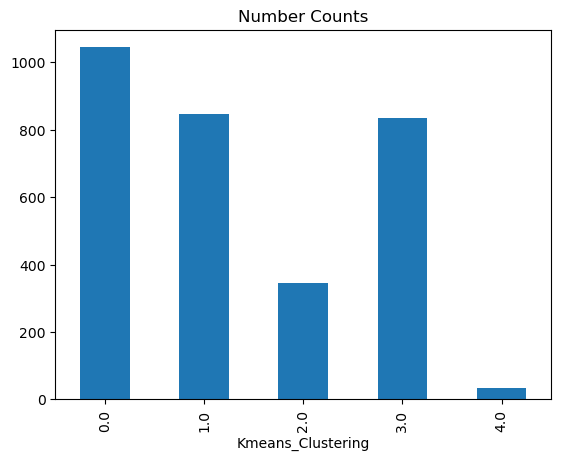

In [94]:
# Total numbers in each cluster..

count = count_df.xs('ID#' ,axis = 1)
count.plot(kind='bar', title= 'Number Counts')
plt.show()

In [91]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==0.0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==1.0].mean(),columns= ['Cluster2_avg'])
cluster3 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==2.0].mean(),columns= ['Cluster3_avg'])
cluster4 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==3.0].mean(),columns= ['Cluster4_avg'])
cluster5 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==4.0].mean(),columns= ['Cluster5_avg'])

In [92]:
avg_df = pd.concat([cluster1,cluster2,cluster3,cluster4,cluster5],axis=1)
avg_df

,Cluster1_avg,Cluster2_avg,Cluster3_avg,Cluster4_avg,Cluster5_avg
ID#,2405.667625,779.062500,1558.469565,1311.139089,1719.647059
Balance,67358.378352,98525.721698,90446.866667,86018.896882,75623.294118
Qual_miles,108.329502,185.899764,155.205797,176.318945,0.000000
cc1_miles,2.035441,2.345519,2.275362,2.233813,2.735294
cc2_miles,1.013410,1.009434,1.023188,1.013189,1.000000
cc3_miles,1.018199,1.018868,1.000000,1.010791,1.000000
Bonus_miles,16030.127395,21817.048349,20428.588406,19665.065947,29503.352941
Bonus_trans,11.545019,12.884434,12.594203,12.221823,13.382353
Flight_miles_12mo,411.015326,534.015330,452.794203,498.551559,165.235294
Flight_trans_12,1.224138,1.692217,1.530435,1.420863,0.470588


Conclusion :

Need to add future schemes for cluster number two members on different bnus points & different card transaction bonus.

In cluster no two and five customers having most Number of flight miles with freq. flyer credit card in the past 12 months as compare to others Cluster. 



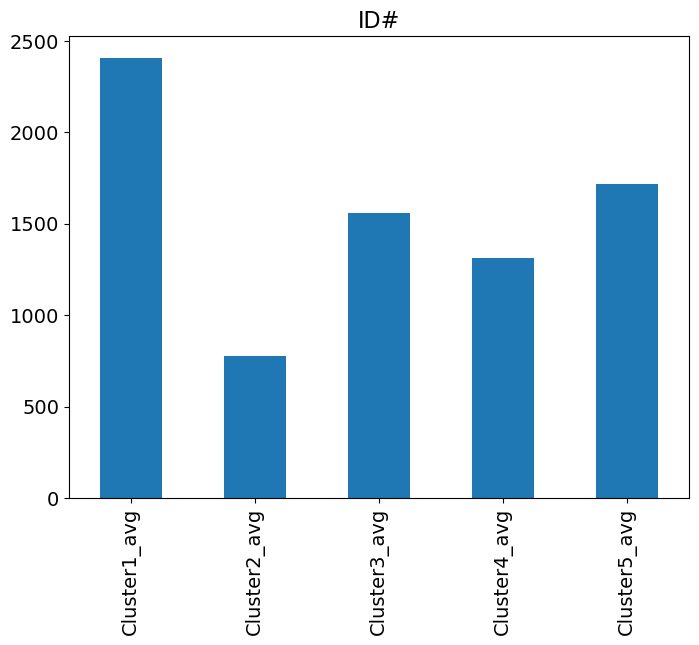

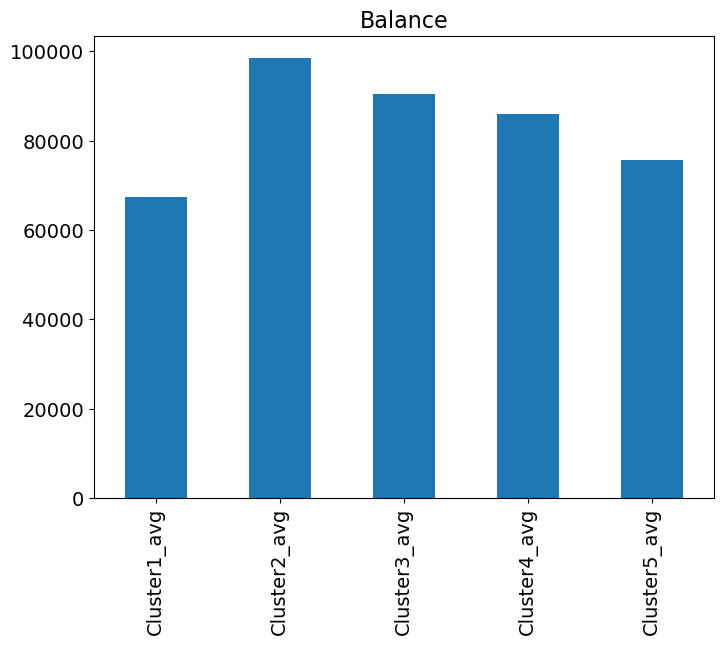

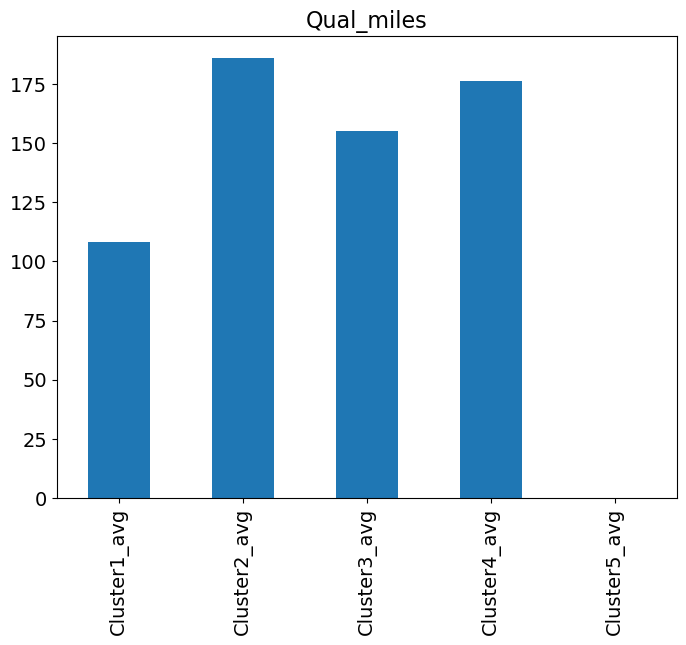

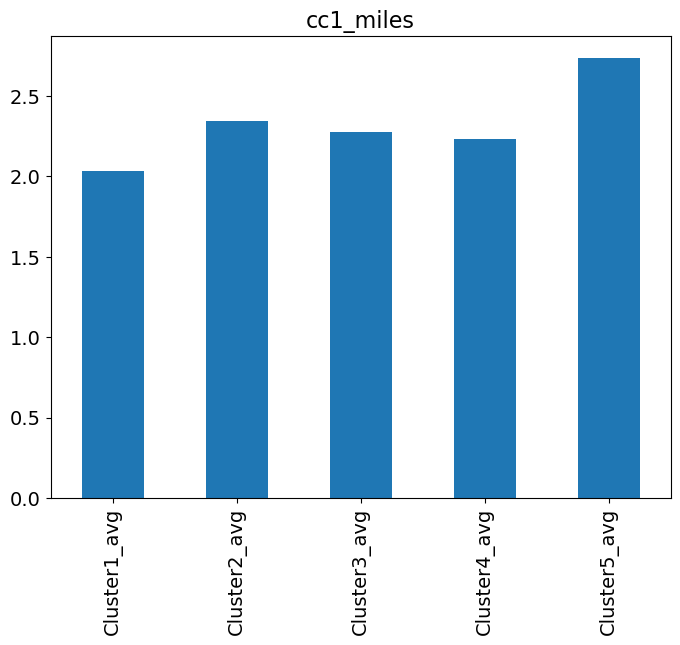

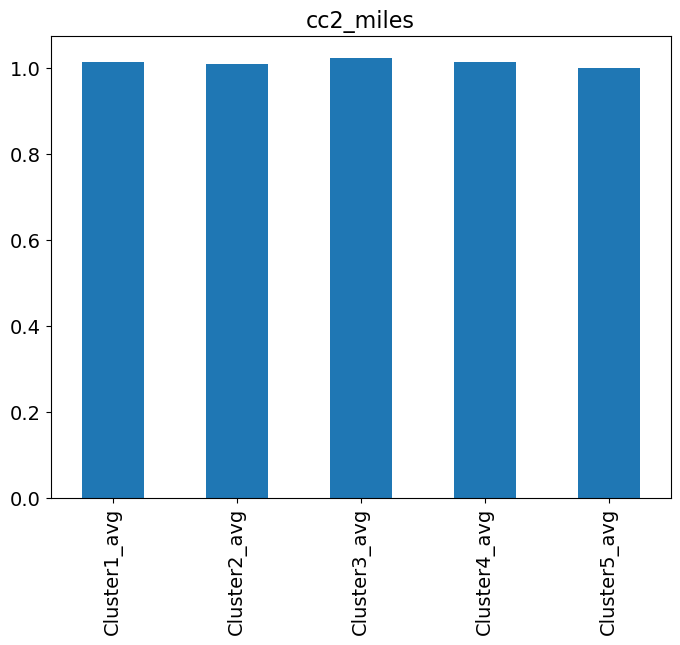

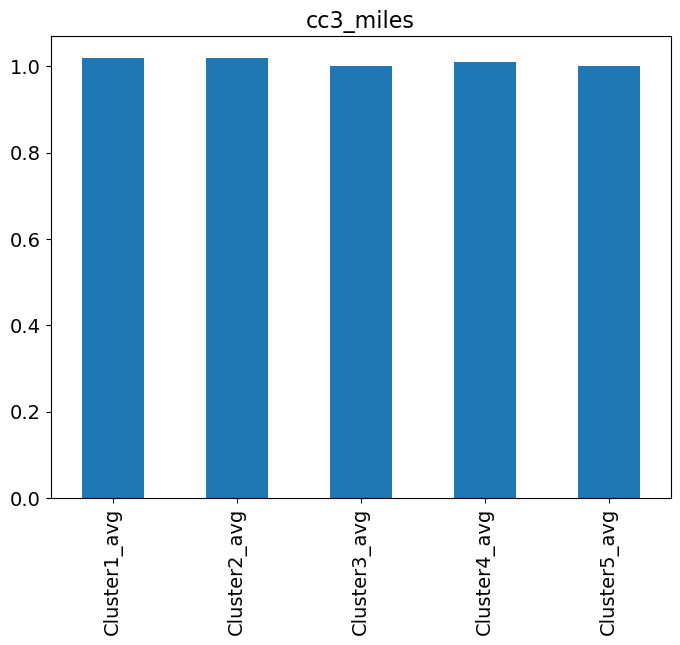

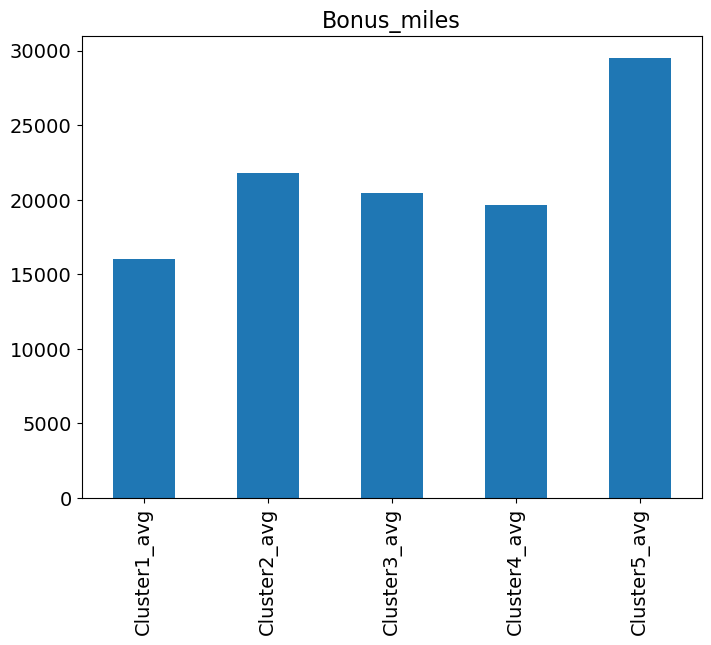

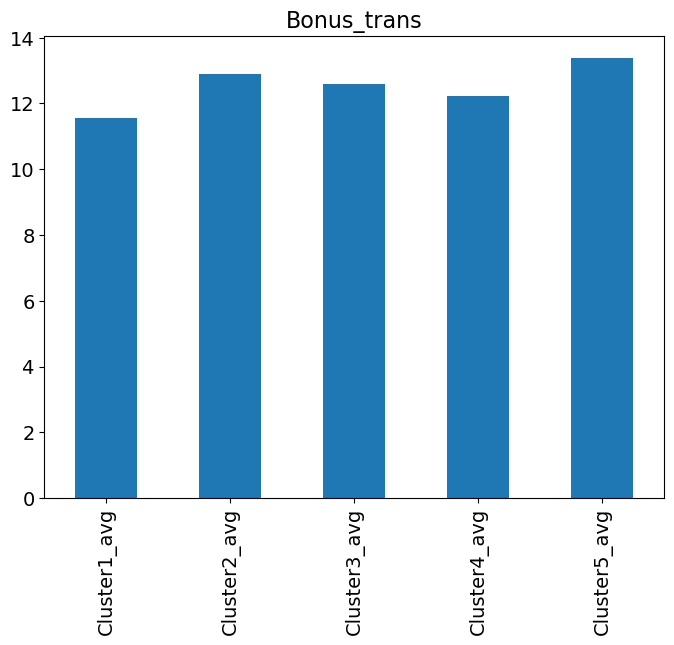

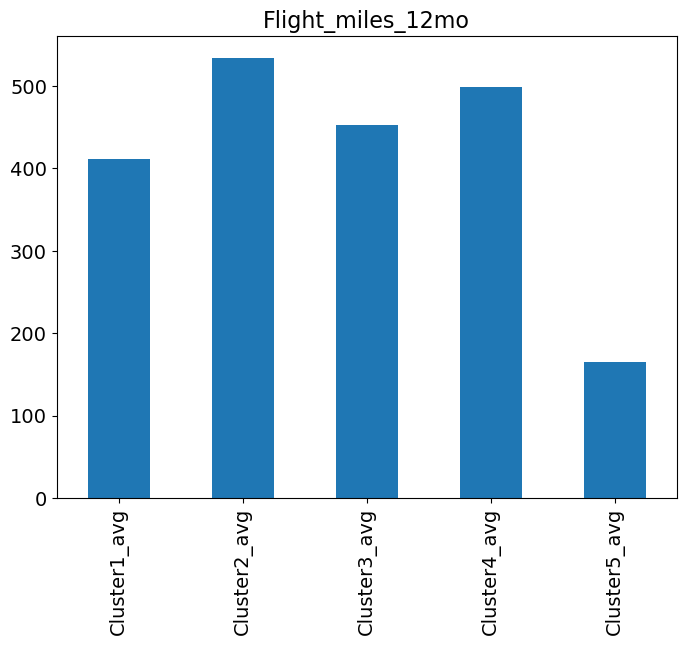

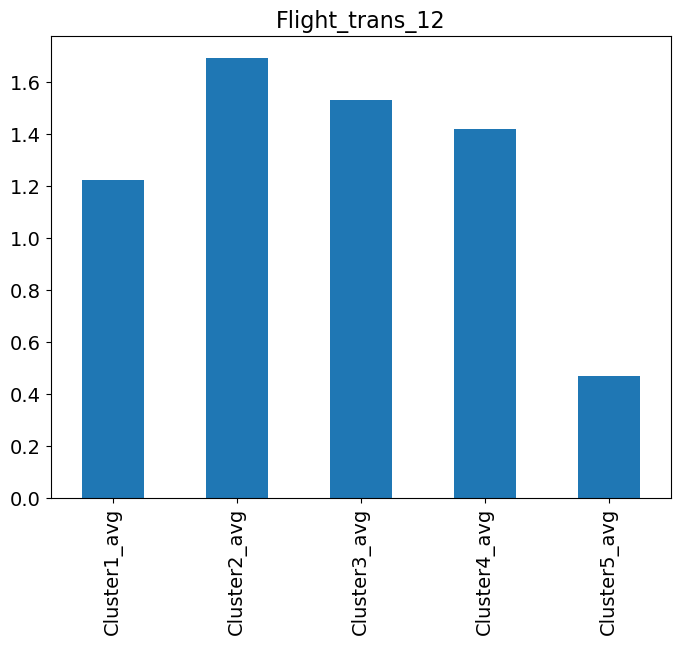

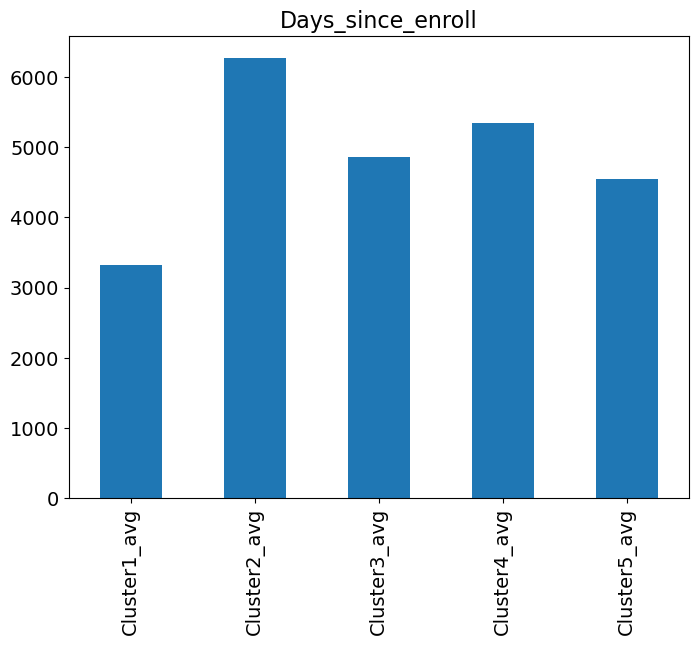

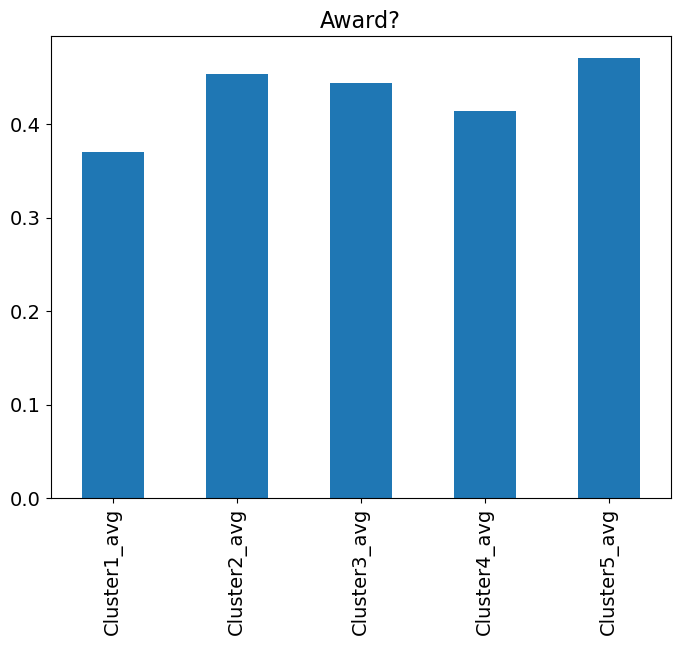

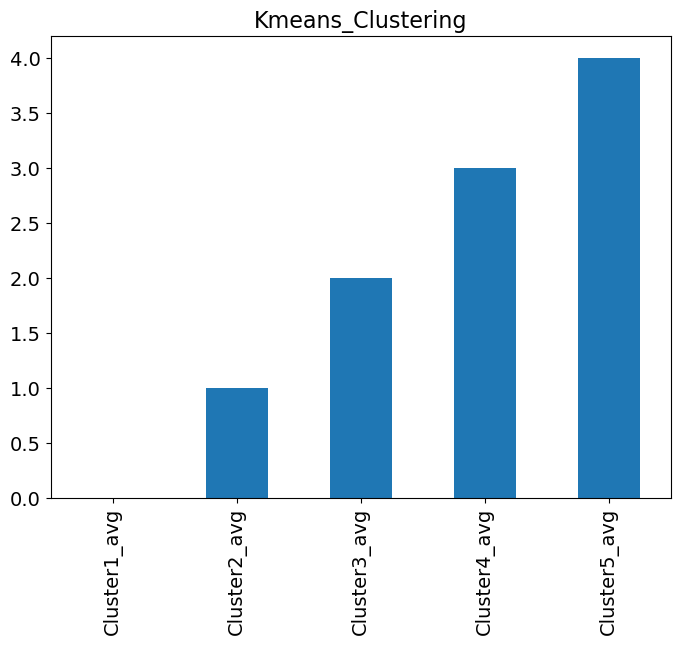

In [95]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()